In [8]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

## Inicio
Abrir imagen

image_4


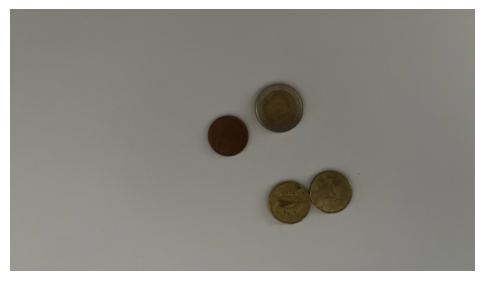

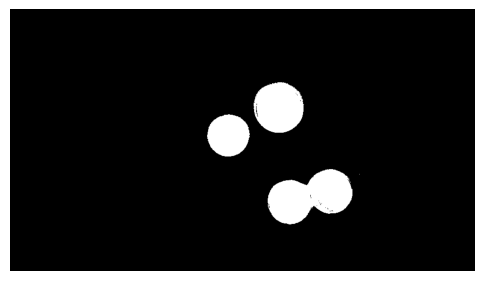

In [9]:
img_files = glob('imagenes/*jpg')

img_num = 3
img_n = os.path.basename(img_files[img_num]).split('.')[0]
print(img_n)

img = cv2.imread(f'imagenes/{img_n}.jpg')

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

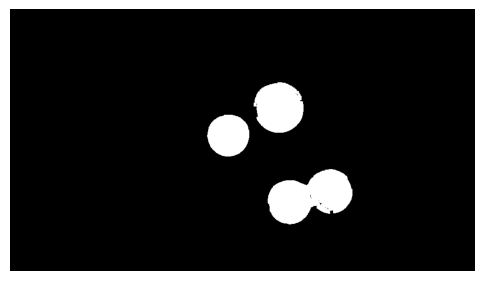

In [10]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

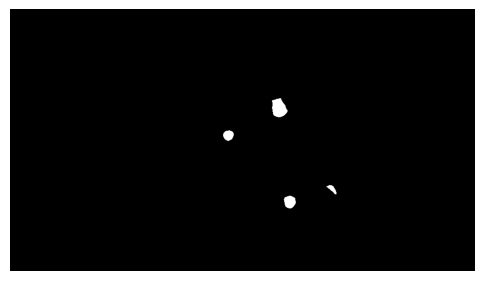

In [11]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sure_fg, cmap='gray')
ax.axis('off')
plt.show()

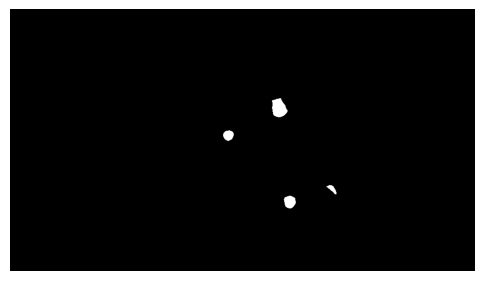

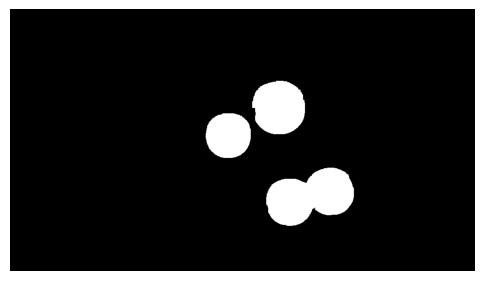

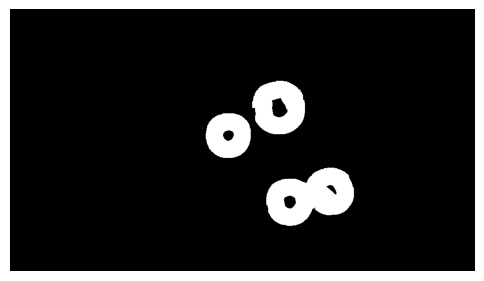

In [12]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sure_fg, cmap='gray')
ax.axis('off')
plt.show()
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sure_bg, cmap='gray')
ax.axis('off')
plt.show()
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(unknown, cmap='gray')
ax.axis('off')
plt.show()

In [13]:
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

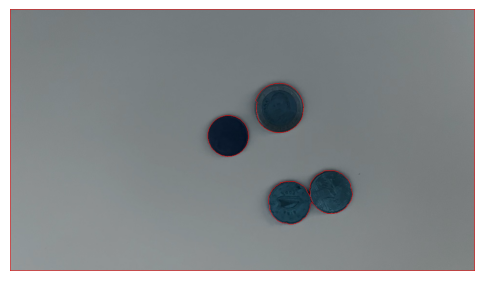

In [14]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')
plt.show()